In [1]:
!pip install tensorpac

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 6.5 MB/s eta 0:00:00


# mount my drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# all below sections is about one recording session

In [3]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_tort

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# from easy_mpl import contour
# from easy_mpl.utils import version_info
import h5py
import matplotlib.tri as tri
# version_info()

# Functions

In [4]:
def load_files(path , dataName):
    with h5py.File(path, 'r') as data:
        data_vec = data[dataName]
        # Get the shape of the data
        shape = data_vec.shape
        data_vec = np.array(data_vec)
        print(f"The shape is: {shape}")
        return data_vec

# Load data

In [5]:
data_it_face = load_files('/content/drive/MyDrive/LFP/data_it_face.mat' , 'data_it_face')
data_it_body = load_files('/content/drive/MyDrive/LFP/data_it_body.mat' , 'data_it_body')
data_it_natural = load_files('/content/drive/MyDrive/LFP/data_it_natural.mat' , 'data_it_natural')
data_it_artifact = load_files('/content/drive/MyDrive/LFP/data_it_artifact.mat' , 'data_it_artifact')

data_pfc_face = load_files('/content/drive/MyDrive/LFP/data_pfc_face.mat' , 'data_pfc_face')
data_pfc_body = load_files('/content/drive/MyDrive/LFP/data_pfc_body.mat' , 'data_pfc_body')
data_pfc_natural = load_files('/content/drive/MyDrive/LFP/data_pfc_natural.mat' , 'data_pfc_natural')
data_pfc_artifact = load_files('/content/drive/MyDrive/LFP/data_pfc_artifact.mat' , 'data_pfc_artifact')

The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)
The shape is: (600, 36, 168)


In [6]:
data_it_face = data_it_face.T
data_it_body = data_it_body.T
data_it_natural = data_it_natural.T
data_it_artifact = data_it_artifact.T


data_pfc_face = data_pfc_face.T
data_pfc_body = data_pfc_body.T
data_pfc_natural = data_pfc_natural.T
data_pfc_artifact = data_pfc_artifact.T

# In this section for Face group PAC ploted on ITC PFC coupling

Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)


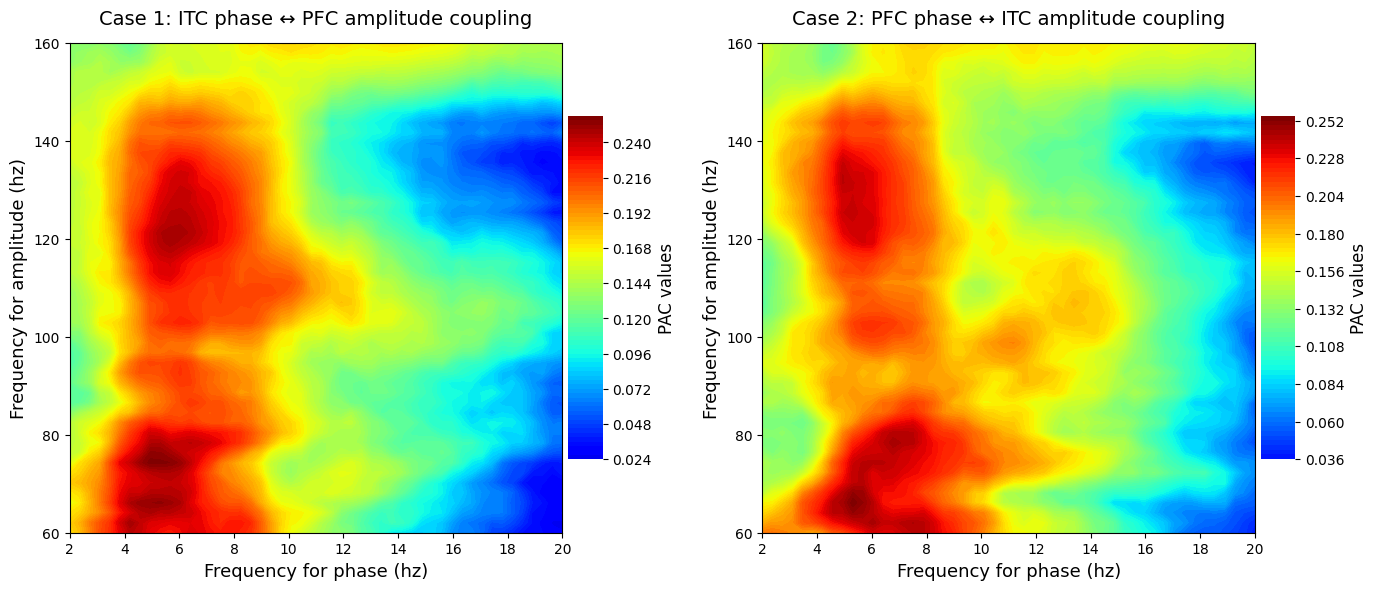

Max value in ITC phase->PFC amp: 0.2565476980044802
Max value in PFC phase ->ITC amp: 0.2540489604291724


In [7]:
# Calculate xpac for the first code
data1 = np.squeeze(np.mean(data_it_face, axis=0))
data2 = np.squeeze(np.mean(data_pfc_face, axis=0))
p1 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac1_face = p1.filterfit(1000, data1, data2)
max_xpac1 = np.max(xpac1_face.mean(-1))

# Calculate xpac for the second code
p2 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac2_face = p2.filterfit(1000, data2, data1)
max_xpac2 = np.max(xpac2_face.mean(-1))
# Plotting the results side by side
fig = plt.figure(figsize=(14, 6))

# Plot for the first case
plt.subplot(1, 2, 1)
p1.comodulogram(xpac1_face.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 1: ITC phase ↔ PFC amplitude coupling',
                fz_title=14, fz_labels=13)

# Plot for the second case
plt.subplot(1, 2, 2)
p2.comodulogram(xpac2_face.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 2: PFC phase ↔ ITC amplitude coupling',
                fz_title=14, fz_labels=13)

plt.tight_layout()
plt.show()

print(f"Max value in ITC phase->PFC amp: {max_xpac1}")
print(f"Max value in PFC phase ->ITC amp: {max_xpac2}")

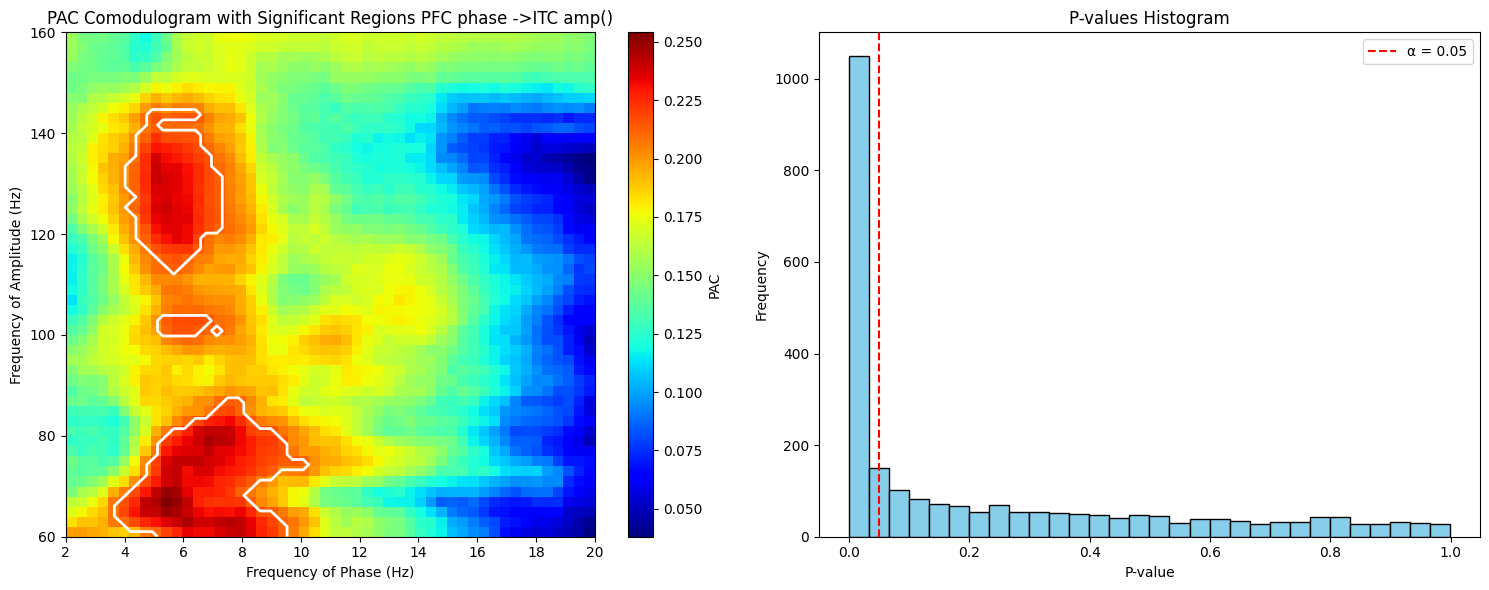

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac2_face, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac2_face.flatten()).reshape(xpac2_face.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions PFC phase ->ITC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


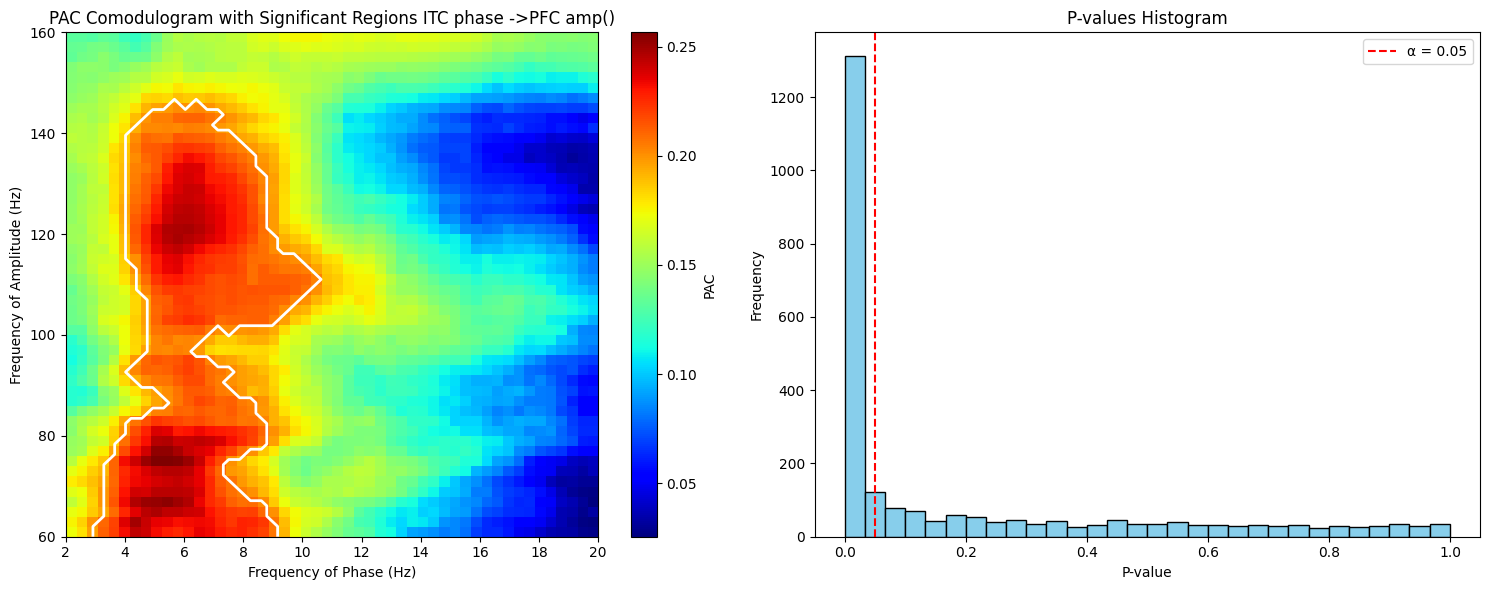

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac1_face, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac1_face.flatten()).reshape(xpac1_face.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions ITC phase ->PFC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


In [10]:
from scipy.stats import ttest_ind
pac1 = xpac1_face
pac2 = xpac2_face
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.2429, P-value: 0.4044


# In this section for Body group PAC ploted on ITC and PFC coupling

Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)


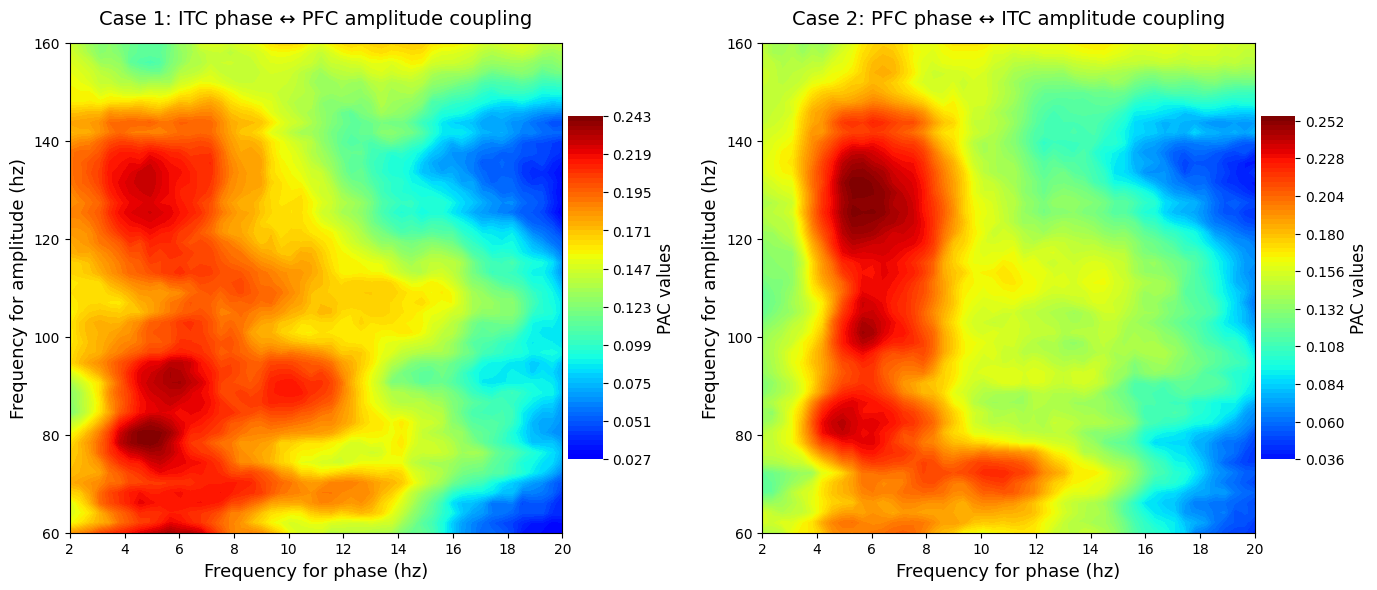

Max value in ITC phase->PFC amp: 0.24249349835609893
Max value in PFC phase ->ITC amp: 0.2544072386331419


In [11]:
# Calculate xpac for the first code
data1 = np.squeeze(np.mean(data_it_body, axis=0))
data2 = np.squeeze(np.mean(data_pfc_body, axis=0))
p1 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac1_body = p1.filterfit(1000, data1, data2)
max_xpac1 = np.max(xpac1_body.mean(-1))

# Calculate xpac for the second code
p2 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac2_body = p2.filterfit(1000, data2, data1)
max_xpac2 = np.max(xpac2_body.mean(-1))
# Plotting the results side by side
fig = plt.figure(figsize=(14, 6))

# Plot for the first case
plt.subplot(1, 2, 1)
p1.comodulogram(xpac1_body.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 1: ITC phase ↔ PFC amplitude coupling',
                fz_title=14, fz_labels=13)

# Plot for the second case
plt.subplot(1, 2, 2)
p2.comodulogram(xpac2_body.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 2: PFC phase ↔ ITC amplitude coupling',
                fz_title=14, fz_labels=13)

plt.tight_layout()
plt.show()

print(f"Max value in ITC phase->PFC amp: {max_xpac1}")
print(f"Max value in PFC phase ->ITC amp: {max_xpac2}")

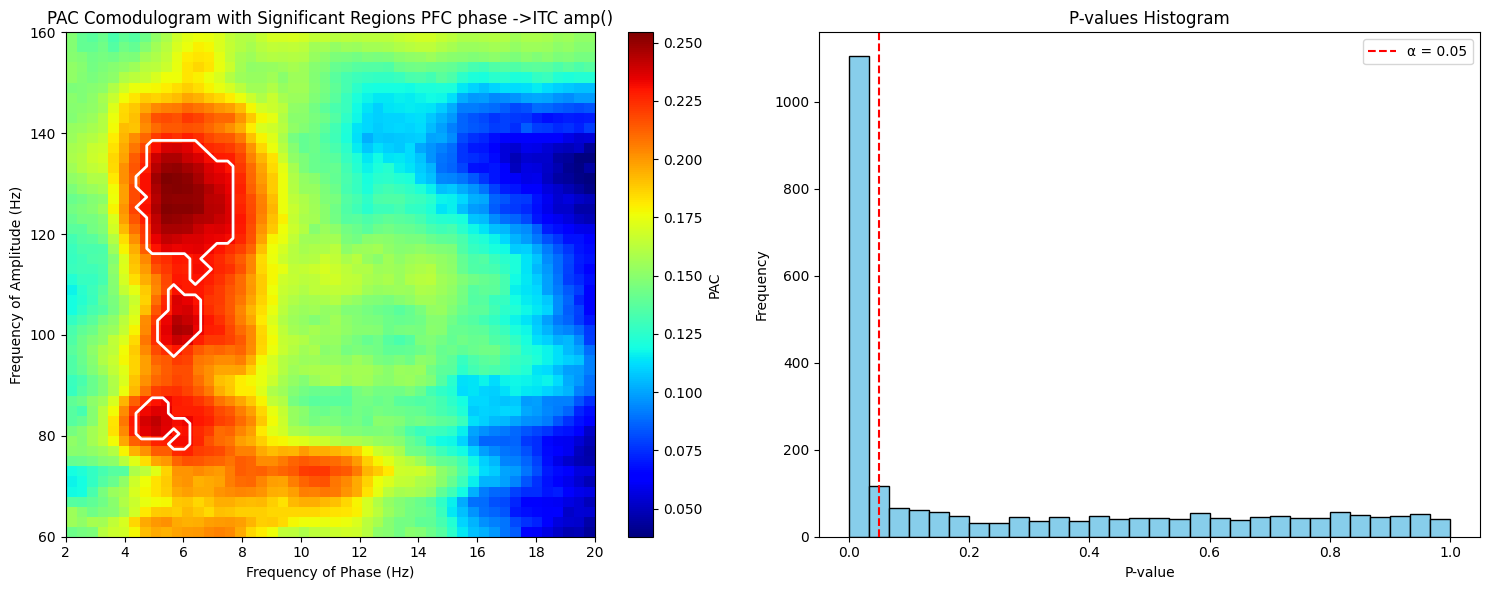

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac2_body, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac2_body.flatten()).reshape(xpac2_body.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions PFC phase ->ITC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


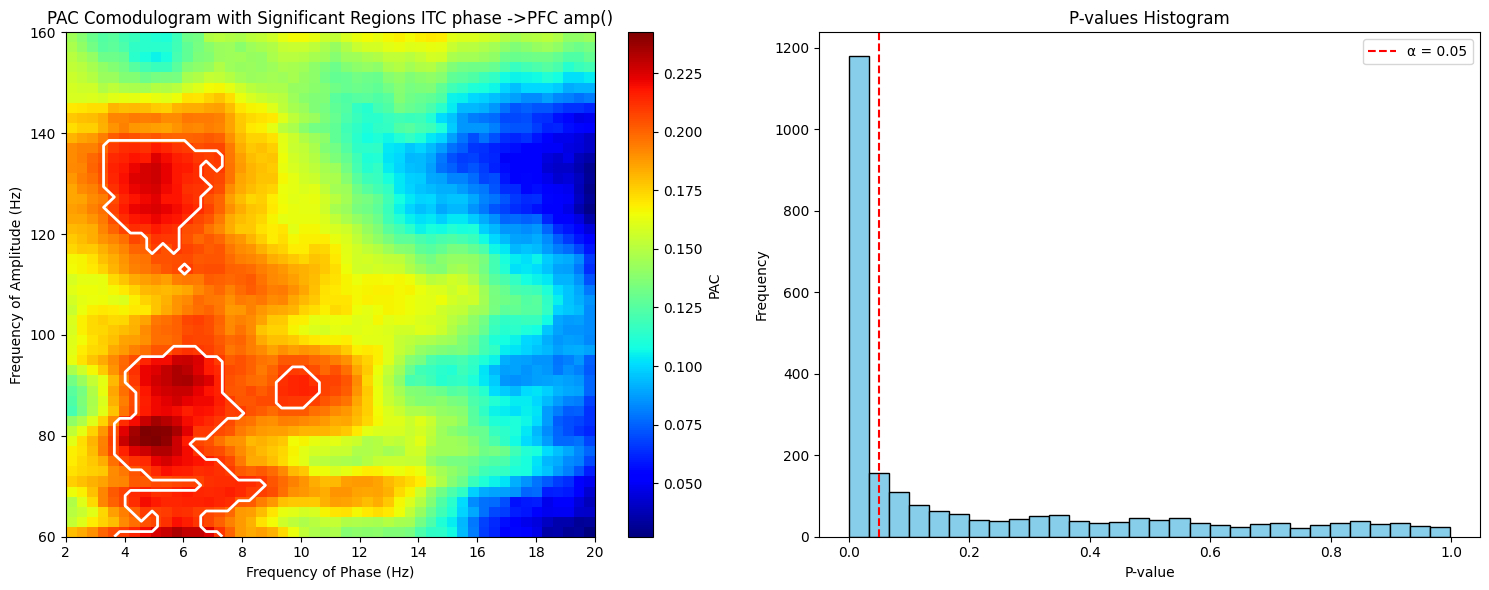

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac1_body, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac1_body.flatten()).reshape(xpac1_body.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions ITC phase ->PFC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import ttest_ind
pac1 = xpac1_body
pac2 = xpac2_body
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.6662, P-value: 0.2537


# In this section for Natural group PAC ploted on ITC and PFC coupling

Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)


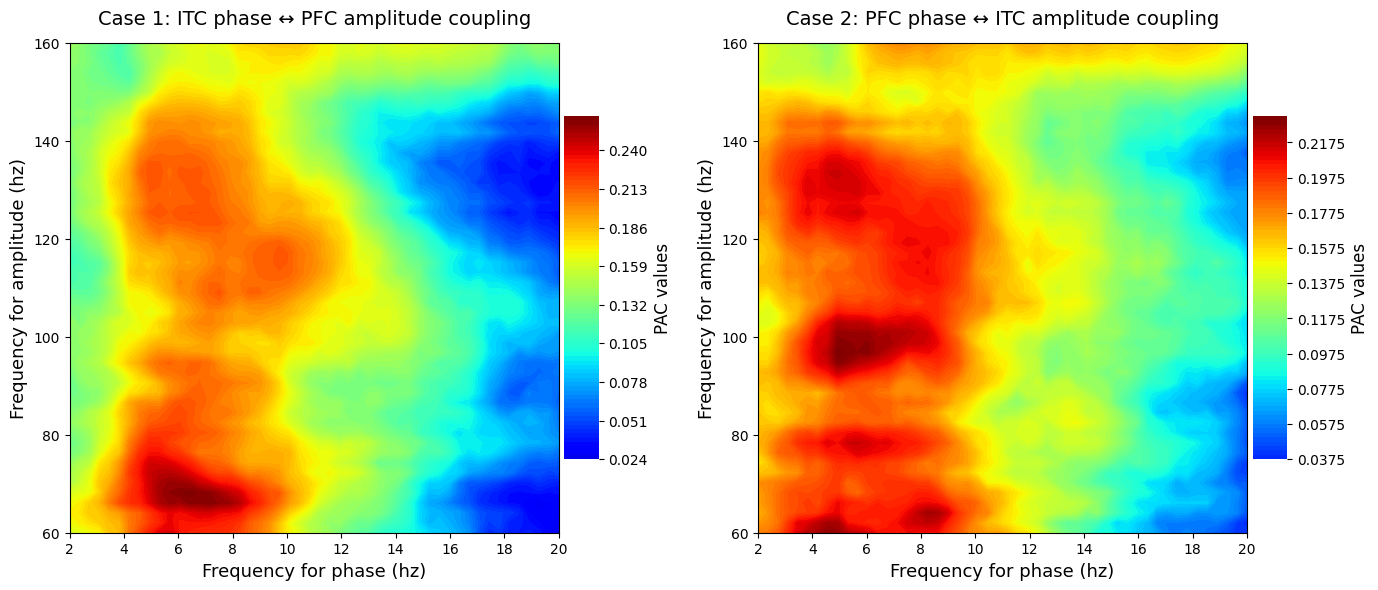

Max value in ITC phase->PFC amp: 0.262292981170991
Max value in PFC phase ->ITC amp: 0.231325823452949


In [16]:
# Calculate xpac for the first code
data1 = np.squeeze(np.mean(data_it_natural, axis=0))
data2 = np.squeeze(np.mean(data_pfc_natural, axis=0))
p1 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac1_natural = p1.filterfit(1000, data1, data2)
max_xpac1 = np.max(xpac1_natural.mean(-1))

# Calculate xpac for the second code
p2 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac2_natural = p2.filterfit(1000, data2, data1)
max_xpac2 = np.max(xpac2_natural.mean(-1))
# Plotting the results side by side

fig = plt.figure(figsize=(14, 6))

# Plot for the first case
plt.subplot(1, 2, 1)
p1.comodulogram(xpac1_natural.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 1: ITC phase ↔ PFC amplitude coupling',
                fz_title=14, fz_labels=13)

# Plot for the second case
plt.subplot(1, 2, 2)
p2.comodulogram(xpac2_natural.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 2: PFC phase ↔ ITC amplitude coupling',
                fz_title=14, fz_labels=13)

plt.tight_layout()
plt.show()

print(f"Max value in ITC phase->PFC amp: {max_xpac1}")
print(f"Max value in PFC phase ->ITC amp: {max_xpac2}")

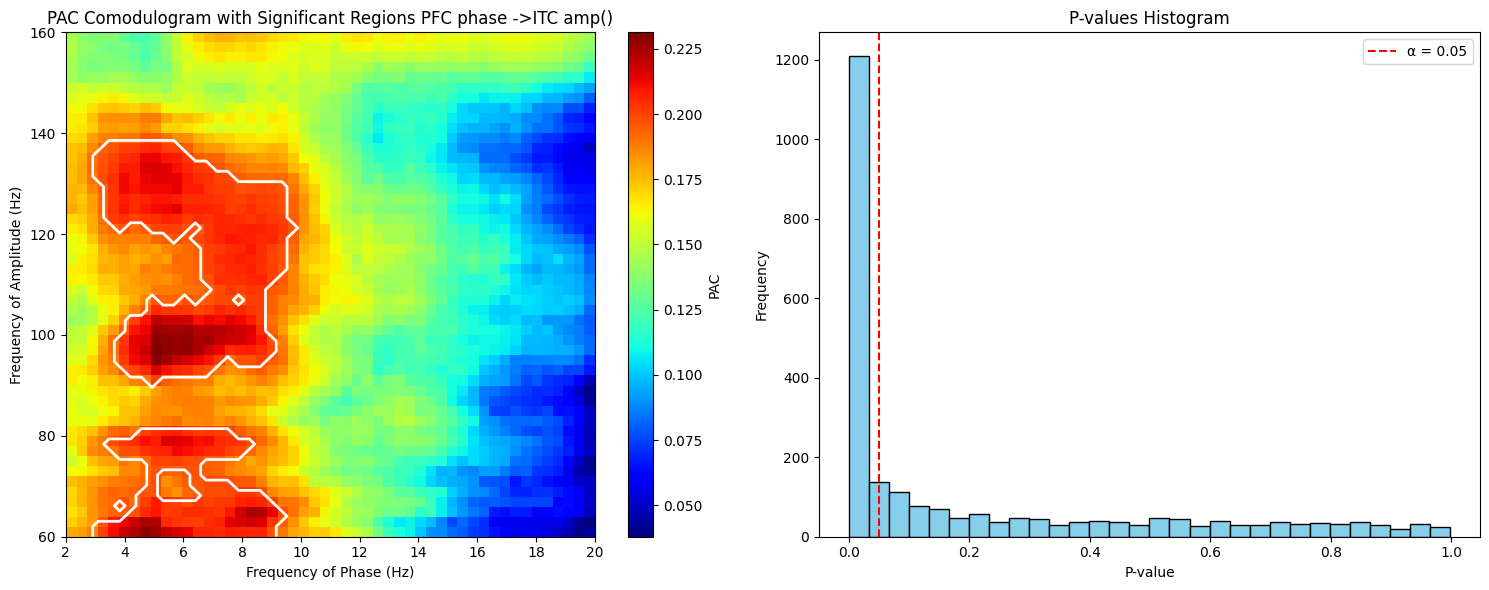

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac2_natural, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac2_natural.flatten()).reshape(xpac2_natural.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions PFC phase ->ITC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


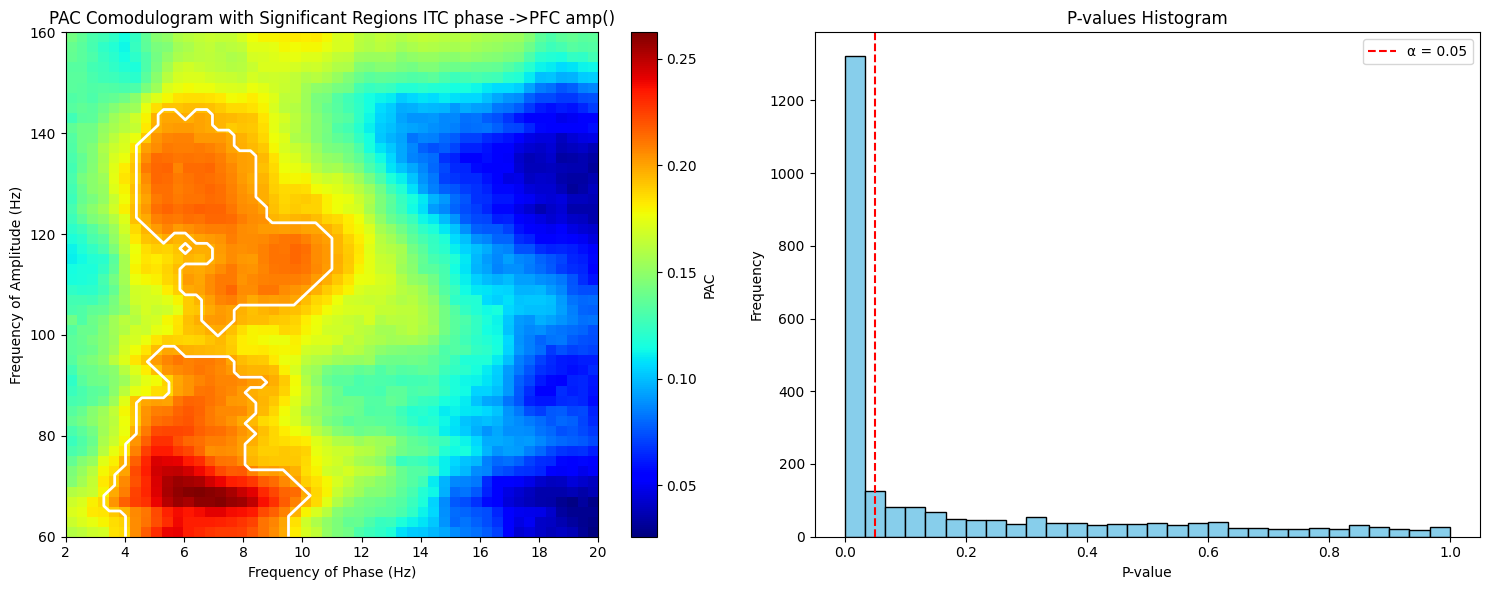

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac1_natural, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac1_natural.flatten()).reshape(xpac1_natural.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions ITC phase ->PFC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import ttest_ind
pac1 = xpac1_natural
pac2 = xpac2_natural
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 1.6710, P-value: 0.0496


# In this section for Artificial group PAC ploted on ITC and PFC coupling

Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
Phase Amplitude Coupling object defined
INFO:tensorpac:Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
INFO:tensorpac:    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
INFO:tensorpac:    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)


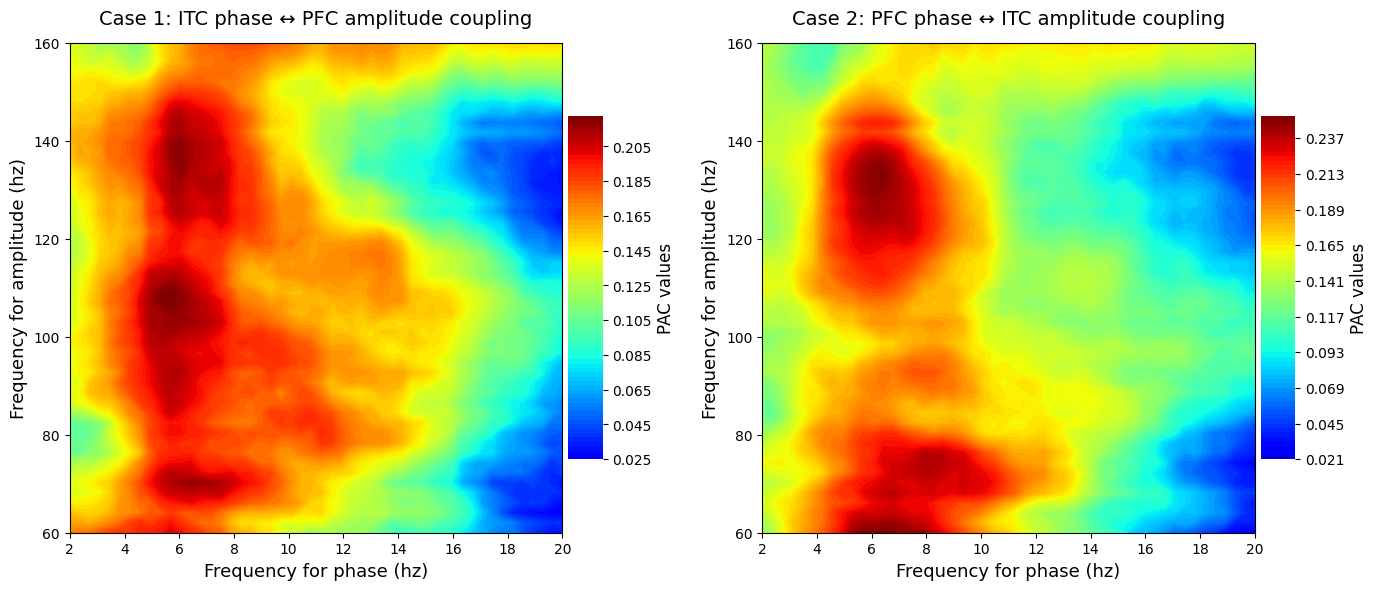

Max value in ITC phase->PFC amp: 0.22164390249910781
Max value in PFC phase ->ITC amp: 0.250615972173102


In [20]:
# Calculate xpac for the first code
data1 = np.squeeze(np.mean(data_it_artifact, axis=0))
data2 = np.squeeze(np.mean(data_pfc_artifact, axis=0))
p1 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac1_artificial = p1.filterfit(1000, data1, data2)
max_xpac1 = np.max(xpac1_artificial.mean(-1))

# Calculate xpac for the second code
p2 = Pac(idpac=(4, 0, 0), f_pha='hres', f_amp='hres')
xpac2_artificial = p2.filterfit(1000, data2, data1)
max_xpac2 = np.max(xpac2_artificial.mean(-1))
# Plotting the results side by side
fig = plt.figure(figsize=(14, 6))

# Plot for the first case
plt.subplot(1, 2, 1)
p1.comodulogram(xpac1_artificial.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 1: ITC phase ↔ PFC amplitude coupling',
                fz_title=14, fz_labels=13)

# Plot for the second case
plt.subplot(1, 2, 2)
p2.comodulogram(xpac2_artificial.mean(-1), cmap='jet', plotas='contour', ncontours=80,
                title='Case 2: PFC phase ↔ ITC amplitude coupling',
                fz_title=14, fz_labels=13)


plt.tight_layout()
plt.show()

print(f"Max value in ITC phase->PFC amp: {max_xpac1}")
print(f"Max value in PFC phase ->ITC amp: {max_xpac2}")

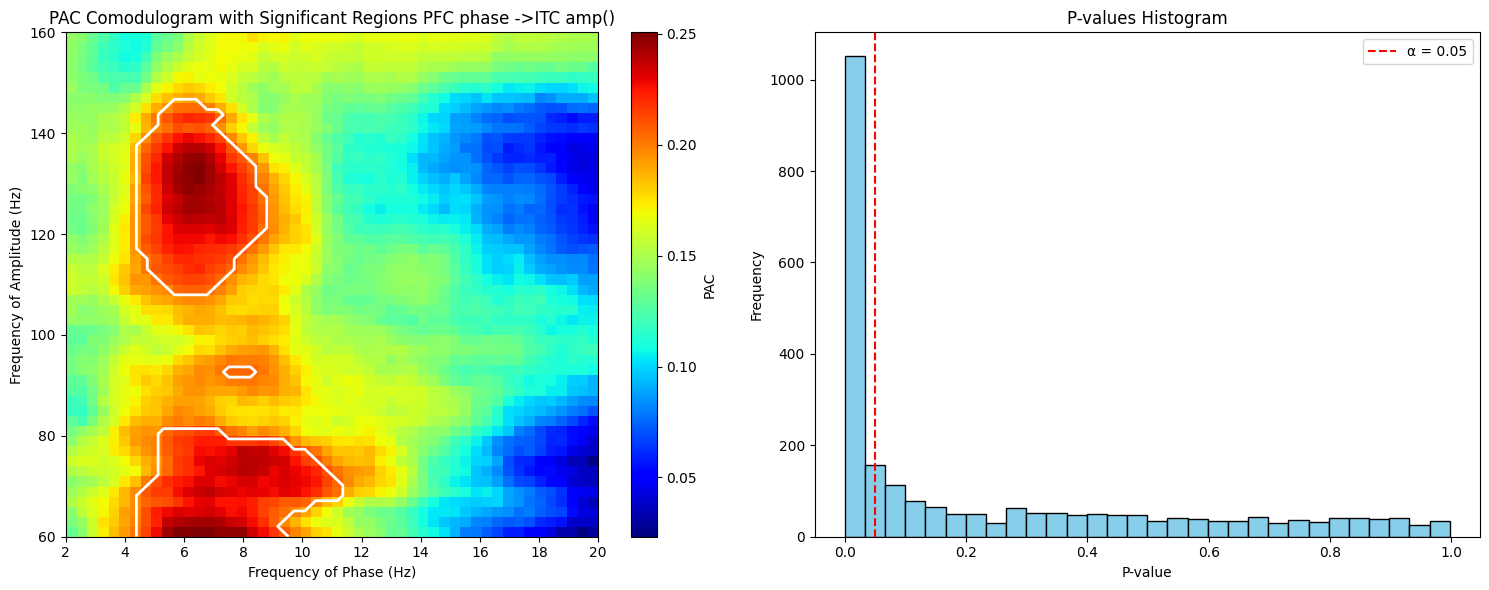

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac2_artificial, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac2_artificial.flatten()).reshape(xpac2_artificial.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions PFC phase ->ITC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


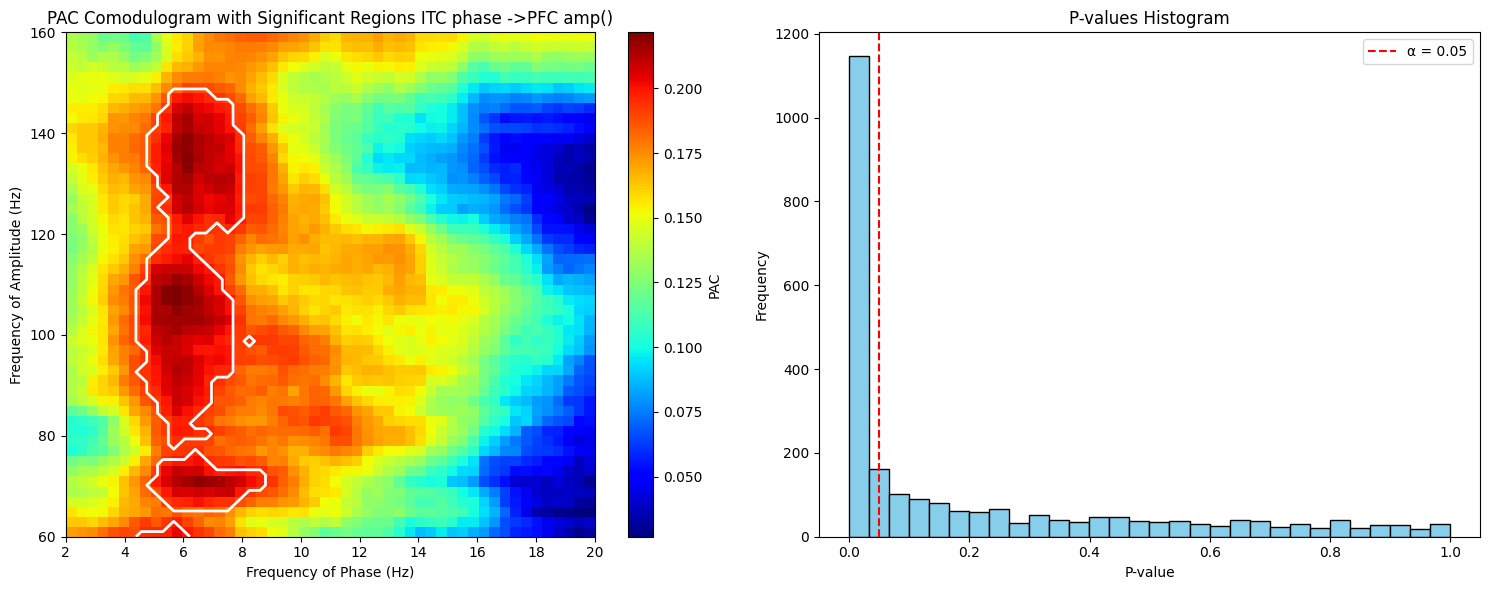

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Step 1: Compute mean PAC across trials
mean_pac = np.mean(xpac1_artificial, axis=2)

# Step 2: Generate surrogate data for null distribution
n_surrogates = 1000
surrogate_pac = np.random.permutation(xpac1_artificial.flatten()).reshape(xpac1_artificial.shape)
surrogate_mean = np.mean(surrogate_pac, axis=2)

# Step 3: Compute z-scores
z_scores = (mean_pac - np.mean(surrogate_mean)) / np.std(surrogate_mean)

# Step 4: Identify significant regions
alpha = 0.05
threshold = np.abs(zscore(np.random.normal(size=n_surrogates)).max())  # Two-tailed
significant_mask = z_scores > threshold

# Step 5: Compute P-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-values

# Step 6: Plotting the comodulogram and P-value histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Comodulogram
phase_freqs = np.linspace(2, 20, mean_pac.shape[1])  # Phase frequency range (2–20 Hz)
amplitude_freqs = np.linspace(60, 160, mean_pac.shape[0])  # Amplitude frequency range (60–160 Hz)
c = ax[0].imshow(mean_pac, origin='lower', extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]],
                 cmap='jet', aspect='auto')
plt.colorbar(c, ax=ax[0], label="PAC")
ax[0].contour(significant_mask, levels=[0.5], colors='white', linewidths=2,
              extent=[phase_freqs[0], phase_freqs[-1], amplitude_freqs[0], amplitude_freqs[-1]])
ax[0].set_title("PAC Comodulogram with Significant Regions ITC phase ->PFC amp()")
ax[0].set_xlabel("Frequency of Phase (Hz)")
ax[0].set_ylabel("Frequency of Amplitude (Hz)")

# P-value Histogram
ax[1].hist(p_values.flatten(), bins=30, color='skyblue', edgecolor='black')
ax[1].axvline(alpha, color='red', linestyle='--', label=f'α = {alpha}')
ax[1].set_title("P-values Histogram")
ax[1].set_xlabel("P-value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
plt.show()


In [23]:
from scipy.stats import ttest_ind
pac1 = xpac1_artificial
pac2 = xpac2_artificial
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: -0.7603, P-value: 0.7752


# Comparision Between Categoties

In [31]:
from scipy.stats import ttest_ind
pac1 = xpac2_artificial
pac2 = xpac2_face
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.3401, P-value: 0.3674


In [32]:
from scipy.stats import ttest_ind
pac1 = xpac2_artificial
pac2 = xpac2_natural
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 1.8555, P-value: 0.0339


In [33]:
from scipy.stats import ttest_ind
pac1 = xpac2_artificial
pac2 = xpac2_body
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.9936, P-value: 0.1619


In [34]:
from scipy.stats import ttest_ind
pac1 = xpac2_face
pac2 = xpac2_body
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.6767, P-value: 0.2504


In [35]:
from scipy.stats import ttest_ind
pac1 = xpac2_face
pac2 = xpac2_natural
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 1.5244, P-value: 0.0660


In [36]:
from scipy.stats import ttest_ind
pac1 = xpac2_body
pac2 = xpac2_natural
# Compute max PAC for each trial
max_pac1_trials = np.max(pac1, axis=(0, 1))
max_pac2_trials = np.max(pac2, axis=(0, 1))

# T-test
t_stat, p_value = ttest_ind(max_pac1_trials, max_pac2_trials, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 0.7520, P-value: 0.2273
